In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import sklearn
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

In [56]:
train = pd.read_csv('Train_Plant1_added_features_min_max.csv')

In [57]:
train['DATE_TIME'] = pd.to_datetime(train['DATE_TIME'])
train["HOUR"] = train['DATE_TIME'].dt.hour
train["MINUTE"] = train['DATE_TIME'].dt.minute
train["DAY_OF_YEAR"] = train['DATE_TIME'].dt.dayofyear
train["NIGHT"] = [1 if i == 0 else 1 for i in train['IRRADIATION']]
#'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1'

In [58]:
 train_columns = [
        'HOUR',
       'MINUTE',
       'DAY_OF_YEAR',
       'NIGHT',
       'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1',
       'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_1',
       'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_1',
       'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_1',
       'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_2',
       'AC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_2',
       'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_2',
       'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_2',
       'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_2',
       'DC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_3',
       'AC_POWER_PER_INVERTER_DAY_SHIFT_MINUS_3',
       'AMBIENT_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_3',
       'MODULE_TEMPERATURE_PER_INVERTER_DAY_SHIFT_MINUS_3',
       'IRRADIATION_PER_INVERTER_DAY_SHIFT_MINUS_3']

In [59]:
train = train[train['ARTIFICIAL']==0]
y_train = train['DC_POWER']

In [60]:
train = train[train_columns]
pca = PCA(n_components=0.99)
pca.fit(train)
print('n_components',pca.n_components_)
X_train = pca.transform(train)

n_components 4


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#rf.fit(X_train,y_train)

In [62]:
#param_grid = {'max_depth':[2,3,4,5], 'n_estimators':[50,100,150]}
#grd_srch = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid,
#                       scoring='neg_root_mean_squared_error')
#grd_srch.fit(X_train,y_train)
#This takes something like 15 mins to run, but grid search showed best parameter was max depth 4 n_estimators 100

In [63]:
#best_params = grd_srch.best_params_
#best_params

In [64]:
rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [65]:
rf.feature_importances_

array([0.01445361, 0.08758259, 0.12737904, 0.77058476])

In [66]:
test = pd.read_csv('Test_Plant1_added_features_min_max.csv')

In [67]:
test['DATE_TIME'] = pd.to_datetime(test['DATE_TIME'])
test["HOUR"] = test['DATE_TIME'].dt.hour
test["MINUTE"] = test['DATE_TIME'].dt.minute
test["DAY_OF_YEAR"] = test['DATE_TIME'].dt.dayofyear
test["NIGHT"] = [1 if i == 0 else 1 for i in test['IRRADIATION']]

In [68]:
X_test = test[train_columns]
X_test = pca.transform(X_test)
y_test = test['DC_POWER']

In [69]:
predictions = rf.predict(X_test)
np.max(predictions)

11193.216964490002

In [70]:
#from sklearn.metrics import mean_squared_error
print('RMSE', np.mean((y_test-predictions)**2)**0.5)
print('MAE', np.mean(np.abs(y_test-predictions)))
print('R2', r2_score(y_test, predictions))

RMSE 3607.6891804556394
MAE 2952.3157155409303
R2 -0.15386963627879124


In [71]:
print(np.mean(y_test))
print(np.mean(predictions))

1828.2485708594731
3219.426055065046


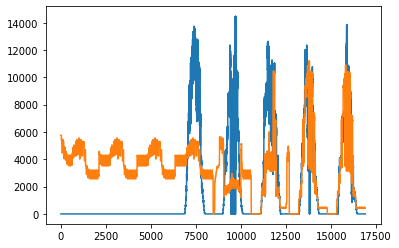

In [72]:
plt.figure()
plt.plot(y_test)
plt.plot(predictions)

In [73]:
np.mean((y_test[11000:]-predictions[11000:])**2)**0.5

2434.366038161849

In [74]:
test['PREDICTIONS']=predictions

In [75]:
daily_y_test = test.groupby('DAY_OF_YEAR').sum()['DC_POWER']
daily_predictions = test.groupby('DAY_OF_YEAR').sum()['PREDICTIONS']

In [76]:
print('RMSE', np.mean((daily_y_test-daily_predictions)**2)**0.5)
print('MAE', np.mean(np.abs(daily_y_test-daily_predictions)))
print('R2', r2_score(daily_y_test, daily_predictions))

RMSE 5222459.185552445
MAE 3624121.466097176
R2 -1.9201137344550672
